In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [7]:
# K means algorithm
class KMeans:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, X):
        # Step 1: Initialize centroids randomly from the dataset
        np.random.seed(42)  # For reproducibility
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(self.max_iters):
            # Step 2: Assign each point to the nearest centroid
            clusters = self._assign_clusters(X)

            # Step 3: Compute new centroids
            new_centroids = self._compute_centroids(X, clusters)

            # Step 4: Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tolerance:
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        """ Assign each data point to the closest centroid. """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X, clusters):
        """ Compute the new centroids as the mean of the assigned points. """
        return np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])

    def predict(self, X):
        """ Predict cluster labels for new data points. """
        return self._assign_clusters(X)


In [6]:
# fetching dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/customer_segmentation.csv")
# df.head()
data = df.to_numpy()

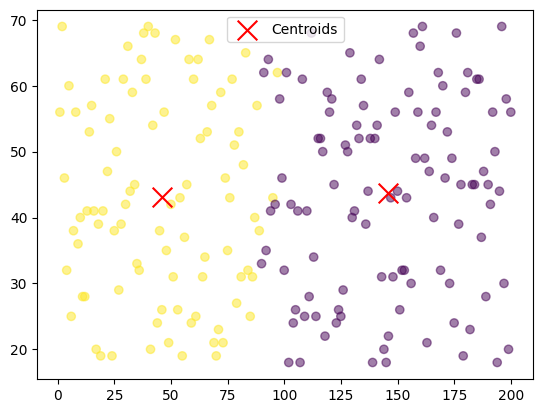

In [14]:
# Running K-Means
X = data
kmeans = KMeans(k=2)
kmeans.fit(X)

# Visualizing Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X), cmap='viridis', alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.show()